## SL

In [1]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from utils import CustomImageFolder, FineTuneTrain, xt_xent, PreTrainSSL
from torch.utils.data import random_split
import numpy as np
import os
import matplotlib.pylab as plt
import torch
import glob


* Tutorial of SimCLR: <a>https://www.youtube.com/watch?v=R1AioRNnM68</a>

### Load Train data and preprocessing

#### Define Transform

In [2]:
transform = transforms.Compose([
    
    transforms.RandomOrder([
        # transforms.RandomHorizontalFlip(0.5),
        transforms.RandomResizedCrop(128, scale=(0.5, 1), ratio=(1, 1)),
        # transforms.ColorJitter(0.4, 0.4, 0.4, 0.1),
        transforms.ToTensor(),
        ]),
    
    # transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5s, 0.5))
    # transforms.ToTensor(),
    # transforms.ToPILImage(),
])

#### Load Data from Folder

In [3]:
dt = CustomImageFolder(os.getcwd()+'\\data', transform=transform)#

# spilt ratio -> 0.8 : 0.2
train, test = random_split(dt, [5120, 1280], generator=torch.Generator().manual_seed(42))

# spilt train dataset into 1% 10% 20% 50% to fine-tune evaluation
train_1, train_10, train_20, train_50, _ = random_split(train,[52, 512, 1024, 2560, 972] )

In [4]:
# 1% Train Dataset
train_1 = DataLoader(train_1, batch_size=32, shuffle=True, num_workers=0)
# 10% Train Dataset
train_10 = DataLoader(train_10, batch_size=32, shuffle=True, num_workers=0)
# 20% Train Dataset
train_20 = DataLoader(train_20, batch_size=32, shuffle=True, num_workers=0)
# 50% Train Dataset
train_50 = DataLoader(train_50, batch_size=32, shuffle=True, num_workers=0)
# Full Train Dataset
train = DataLoader(train, batch_size=32, shuffle=True, num_workers=0)
# Test Dataset
test = DataLoader(test, batch_size=256, shuffle=True, num_workers=0)

In [5]:
# Check the content of dataloader
img1 = None
img2 = None
img3 = None
label = None

for image1, image2, image3, labels in train:
    for j in range(image1.shape[0]):
        img1 = image1[j].permute(1, 2, 0)
        img2 = image2[j].permute(1, 2, 0)
        img3 = image3[j].permute(1, 2, 0)
        label = labels[j].item()
        
        break
    break  

In [6]:
print(label)

2


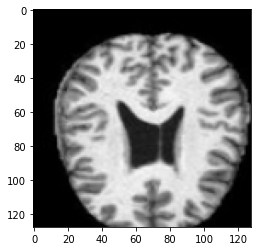

torch.Size([3, 128, 128])


In [7]:
plt.imshow((img1*255.0).int())
plt.show()
print(image1[j].shape)

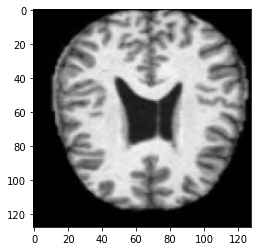

torch.Size([3, 128, 128])


In [8]:
plt.imshow((img2*255.0).int())
plt.show()
print(image1[j].shape)

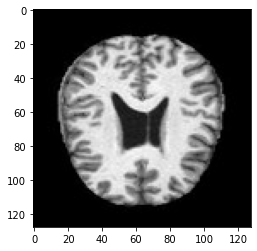

torch.Size([3, 128, 128])


In [9]:
plt.imshow((img3*255.0).int())
plt.show()
print(image1[j].shape)

### Train model

In [10]:
params_model={
    "Pretrain": [False, True],
    "SSL_Pretrain_Weight": 'best_acc_cnn.pth',
}


params_train={
    "num_epochs": 100,
    "train_dl": [train_1, train_10, train_20, train_50, train],
    "test_dl": test,
    "lr": 1e-4,
    "data_size": [1, 10, 20, 50, 100],
    "epoch" : 100,
    "mode": ['SL_without_pretrain', 'SL_with_pretrain', 'SSL_pretrain']
}

In [11]:
# PreTrainSSL(params_train['train_dl'][4], params_train['test_dl'], params_train['epoch'], xt_xent)

In [18]:
FineTuneTrain(params_train['train_dl'][0], params_train['test_dl'], params_train['epoch'], params_train['data_size'][0], params_train['lr'], params_train['mode'][0], params_model) # fine_tune_loader, test_loader

The model will be running on cuda:0 device
SL_without_pretrain


100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


[1] loss: 0.074, acc : 0.327


100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


[1] loss: 0.004, acc : 0.370


100%|██████████| 2/2 [00:00<00:00,  8.69it/s]


[2] loss: 0.085, acc : 0.442


100%|██████████| 5/5 [00:02<00:00,  2.07it/s]


[2] loss: 0.004, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  8.03it/s]


[3] loss: 0.061, acc : 0.577


100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


[3] loss: 0.004, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


[4] loss: 0.053, acc : 0.577


100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


[4] loss: 0.004, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.31it/s]


[5] loss: 0.028, acc : 0.712


100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


[5] loss: 0.005, acc : 0.474


100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


[6] loss: 0.029, acc : 0.654


100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


[6] loss: 0.005, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  4.24it/s]


[7] loss: 0.019, acc : 0.788


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


[7] loss: 0.004, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


[8] loss: 0.022, acc : 0.731


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


[8] loss: 0.004, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  3.89it/s]


[9] loss: 0.019, acc : 0.808


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


[9] loss: 0.005, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


[10] loss: 0.010, acc : 0.904


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


[10] loss: 0.005, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  3.87it/s]


[11] loss: 0.016, acc : 0.885


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


[11] loss: 0.006, acc : 0.499


100%|██████████| 2/2 [00:00<00:00,  5.51it/s]


[12] loss: 0.011, acc : 0.885


100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


[12] loss: 0.005, acc : 0.480


100%|██████████| 2/2 [00:00<00:00,  5.48it/s]


[13] loss: 0.008, acc : 0.942


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


[13] loss: 0.005, acc : 0.492


100%|██████████| 2/2 [00:00<00:00,  6.51it/s]


[14] loss: 0.008, acc : 0.962


100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


[14] loss: 0.005, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.13it/s]


[15] loss: 0.008, acc : 0.904


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[15] loss: 0.005, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  4.81it/s]


[16] loss: 0.005, acc : 0.962


100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


[16] loss: 0.006, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.05it/s]


[17] loss: 0.003, acc : 0.981


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[17] loss: 0.006, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.29it/s]


[18] loss: 0.003, acc : 0.981


100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


[18] loss: 0.006, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.54it/s]


[19] loss: 0.002, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


[19] loss: 0.006, acc : 0.493


100%|██████████| 2/2 [00:00<00:00,  5.25it/s]


[20] loss: 0.002, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


[20] loss: 0.006, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


[21] loss: 0.002, acc : 0.981


100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


[21] loss: 0.006, acc : 0.496


100%|██████████| 2/2 [00:00<00:00,  5.19it/s]


[22] loss: 0.001, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


[22] loss: 0.006, acc : 0.493


100%|██████████| 2/2 [00:00<00:00,  5.33it/s]


[23] loss: 0.001, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


[23] loss: 0.006, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  5.02it/s]


[24] loss: 0.001, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


[24] loss: 0.006, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.45it/s]


[25] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


[25] loss: 0.006, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.06it/s]


[26] loss: 0.001, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


[26] loss: 0.005, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  5.32it/s]


[27] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


[27] loss: 0.006, acc : 0.491


100%|██████████| 2/2 [00:00<00:00,  5.17it/s]


[28] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


[28] loss: 0.006, acc : 0.491


100%|██████████| 2/2 [00:00<00:00,  4.86it/s]


[29] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


[29] loss: 0.006, acc : 0.491


100%|██████████| 2/2 [00:00<00:00,  4.59it/s]


[30] loss: 0.001, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


[30] loss: 0.006, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.51it/s]


[31] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


[31] loss: 0.006, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.48it/s]


[32] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


[32] loss: 0.007, acc : 0.492


100%|██████████| 2/2 [00:00<00:00,  5.21it/s]


[33] loss: 0.001, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[33] loss: 0.007, acc : 0.491


100%|██████████| 2/2 [00:00<00:00,  5.05it/s]


[34] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


[34] loss: 0.007, acc : 0.497


100%|██████████| 2/2 [00:00<00:00,  5.29it/s]


[35] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


[35] loss: 0.007, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  5.44it/s]


[36] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


[36] loss: 0.007, acc : 0.490


100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


[37] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[37] loss: 0.007, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.05it/s]


[38] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


[38] loss: 0.007, acc : 0.490


100%|██████████| 2/2 [00:00<00:00,  4.95it/s]


[39] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


[39] loss: 0.007, acc : 0.496


100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


[40] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[40] loss: 0.007, acc : 0.499


100%|██████████| 2/2 [00:00<00:00,  5.37it/s]


[41] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


[41] loss: 0.007, acc : 0.492


100%|██████████| 2/2 [00:00<00:00,  4.76it/s]


[42] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


[42] loss: 0.007, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


[43] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[43] loss: 0.007, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


[44] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


[44] loss: 0.007, acc : 0.489


100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


[45] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


[45] loss: 0.007, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


[46] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


[46] loss: 0.007, acc : 0.488


100%|██████████| 2/2 [00:00<00:00,  5.51it/s]


[47] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


[47] loss: 0.007, acc : 0.492


100%|██████████| 2/2 [00:00<00:00,  5.07it/s]


[48] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[48] loss: 0.007, acc : 0.496


100%|██████████| 2/2 [00:00<00:00,  5.26it/s]


[49] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


[49] loss: 0.008, acc : 0.498


100%|██████████| 2/2 [00:00<00:00,  5.54it/s]


[50] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


[50] loss: 0.008, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.61it/s]


[51] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


[51] loss: 0.008, acc : 0.504


100%|██████████| 2/2 [00:00<00:00,  7.23it/s]


[52] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


[52] loss: 0.008, acc : 0.496


100%|██████████| 2/2 [00:00<00:00,  6.59it/s]


[53] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


[53] loss: 0.008, acc : 0.498


100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


[54] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


[54] loss: 0.008, acc : 0.499


100%|██████████| 2/2 [00:00<00:00,  6.88it/s]


[55] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


[55] loss: 0.008, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


[56] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


[56] loss: 0.008, acc : 0.493


100%|██████████| 2/2 [00:00<00:00,  5.03it/s]


[57] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


[57] loss: 0.008, acc : 0.493


100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


[58] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


[58] loss: 0.008, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  7.16it/s]


[59] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


[59] loss: 0.008, acc : 0.496


100%|██████████| 2/2 [00:00<00:00,  5.79it/s]


[60] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


[60] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  5.18it/s]


[61] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


[61] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  5.00it/s]


[62] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


[62] loss: 0.008, acc : 0.491


100%|██████████| 2/2 [00:00<00:00,  5.20it/s]


[63] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


[63] loss: 0.008, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  5.02it/s]


[64] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


[64] loss: 0.008, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  4.99it/s]


[65] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


[65] loss: 0.008, acc : 0.488


100%|██████████| 2/2 [00:00<00:00,  4.93it/s]


[66] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[66] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  4.67it/s]


[67] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


[67] loss: 0.008, acc : 0.489


100%|██████████| 2/2 [00:00<00:00,  5.21it/s]


[68] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


[68] loss: 0.008, acc : 0.491


100%|██████████| 2/2 [00:00<00:00,  5.43it/s]


[69] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[69] loss: 0.008, acc : 0.489


100%|██████████| 2/2 [00:00<00:00,  5.14it/s]


[70] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


[70] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  4.06it/s]


[71] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


[71] loss: 0.008, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  3.97it/s]


[72] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


[72] loss: 0.008, acc : 0.490


100%|██████████| 2/2 [00:00<00:00,  5.36it/s]


[73] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


[73] loss: 0.008, acc : 0.491


100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


[74] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[74] loss: 0.008, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  4.73it/s]


[75] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


[75] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  3.94it/s]


[76] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


[76] loss: 0.008, acc : 0.493


100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


[77] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


[77] loss: 0.008, acc : 0.497


100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


[78] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


[78] loss: 0.008, acc : 0.495


100%|██████████| 2/2 [00:00<00:00,  4.55it/s]


[79] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


[79] loss: 0.008, acc : 0.494


100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


[80] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


[80] loss: 0.008, acc : 0.485


100%|██████████| 2/2 [00:00<00:00,  4.04it/s]


[81] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


[81] loss: 0.008, acc : 0.485


100%|██████████| 2/2 [00:00<00:00,  4.27it/s]


[82] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


[82] loss: 0.008, acc : 0.486


100%|██████████| 2/2 [00:00<00:00,  3.60it/s]


[83] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


[83] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


[84] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


[84] loss: 0.008, acc : 0.486


100%|██████████| 2/2 [00:00<00:00,  4.06it/s]


[85] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


[85] loss: 0.008, acc : 0.485


100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


[86] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


[86] loss: 0.008, acc : 0.484


100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


[87] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


[87] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


[88] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


[88] loss: 0.008, acc : 0.484


100%|██████████| 2/2 [00:00<00:00,  3.81it/s]


[89] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


[89] loss: 0.008, acc : 0.489


100%|██████████| 2/2 [00:00<00:00,  3.89it/s]


[90] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


[90] loss: 0.008, acc : 0.488


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


[91] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


[91] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


[92] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


[92] loss: 0.008, acc : 0.484


100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


[93] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


[93] loss: 0.008, acc : 0.485


100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


[94] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


[94] loss: 0.008, acc : 0.484


100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


[95] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


[95] loss: 0.008, acc : 0.482


100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


[96] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


[96] loss: 0.008, acc : 0.484


100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


[97] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


[97] loss: 0.008, acc : 0.483


100%|██████████| 2/2 [00:00<00:00,  3.38it/s]


[98] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


[98] loss: 0.008, acc : 0.481


100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


[99] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


[99] loss: 0.008, acc : 0.487


100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


[100] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

[100] loss: 0.008, acc : 0.490
Best acc : 0.504


In [13]:
FineTuneTrain(params_train['train_dl'][1], params_train['test_dl'], params_train['epoch'], params_train['data_size'][1], params_train['lr'], params_train['mode'][0], params_model) # fine_tune_loader, test_loader

The model will be running on cuda:0 device
SL_without_pretrain


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[1] loss: 0.050, acc : 0.426


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


[1] loss: 0.005, acc : 0.495


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[2] loss: 0.044, acc : 0.479


100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


[2] loss: 0.005, acc : 0.495


100%|██████████| 16/16 [00:07<00:00,  2.11it/s]


[3] loss: 0.038, acc : 0.523


100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


[3] loss: 0.005, acc : 0.494


100%|██████████| 16/16 [00:07<00:00,  2.25it/s]


[4] loss: 0.038, acc : 0.502


100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


[4] loss: 0.005, acc : 0.496


100%|██████████| 16/16 [00:07<00:00,  2.24it/s]


[5] loss: 0.040, acc : 0.482


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[5] loss: 0.005, acc : 0.463


100%|██████████| 16/16 [00:05<00:00,  2.68it/s]


[6] loss: 0.040, acc : 0.508


100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


[6] loss: 0.005, acc : 0.461


100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


[7] loss: 0.034, acc : 0.557


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[7] loss: 0.005, acc : 0.491


100%|██████████| 16/16 [00:06<00:00,  2.60it/s]


[8] loss: 0.034, acc : 0.561


100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


[8] loss: 0.005, acc : 0.422


100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


[9] loss: 0.034, acc : 0.559


100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


[9] loss: 0.005, acc : 0.526


100%|██████████| 16/16 [00:06<00:00,  2.47it/s]


[10] loss: 0.035, acc : 0.582


100%|██████████| 5/5 [00:06<00:00,  1.29s/it]


[10] loss: 0.005, acc : 0.484


100%|██████████| 16/16 [00:06<00:00,  2.51it/s]


[11] loss: 0.033, acc : 0.572


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


[11] loss: 0.005, acc : 0.471


100%|██████████| 16/16 [00:07<00:00,  2.20it/s]


[12] loss: 0.028, acc : 0.664


100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


[12] loss: 0.005, acc : 0.521


100%|██████████| 16/16 [00:07<00:00,  2.12it/s]


[13] loss: 0.030, acc : 0.631


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[13] loss: 0.006, acc : 0.439


100%|██████████| 16/16 [00:07<00:00,  2.15it/s]


[14] loss: 0.026, acc : 0.648


100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


[14] loss: 0.006, acc : 0.498


100%|██████████| 16/16 [00:06<00:00,  2.49it/s]


[15] loss: 0.028, acc : 0.666


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


[15] loss: 0.006, acc : 0.485


100%|██████████| 16/16 [00:07<00:00,  2.16it/s]


[16] loss: 0.028, acc : 0.641


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


[16] loss: 0.007, acc : 0.505


100%|██████████| 16/16 [00:08<00:00,  1.93it/s]


[17] loss: 0.024, acc : 0.689


100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


[17] loss: 0.006, acc : 0.464


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[18] loss: 0.025, acc : 0.688


100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


[18] loss: 0.010, acc : 0.505


100%|██████████| 16/16 [00:07<00:00,  2.16it/s]


[19] loss: 0.029, acc : 0.648


100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


[19] loss: 0.006, acc : 0.489


100%|██████████| 16/16 [00:07<00:00,  2.15it/s]


[20] loss: 0.024, acc : 0.645


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[20] loss: 0.008, acc : 0.516


100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


[21] loss: 0.021, acc : 0.748


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


[21] loss: 0.006, acc : 0.499


100%|██████████| 16/16 [00:07<00:00,  2.18it/s]


[22] loss: 0.018, acc : 0.773


100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


[22] loss: 0.006, acc : 0.552


100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


[23] loss: 0.012, acc : 0.854


100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


[23] loss: 0.006, acc : 0.553


100%|██████████| 16/16 [00:06<00:00,  2.32it/s]


[24] loss: 0.014, acc : 0.840


100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


[24] loss: 0.006, acc : 0.527


100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


[25] loss: 0.009, acc : 0.902


100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


[25] loss: 0.009, acc : 0.518


100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


[26] loss: 0.008, acc : 0.910


100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


[26] loss: 0.007, acc : 0.514


100%|██████████| 16/16 [00:07<00:00,  2.18it/s]


[27] loss: 0.007, acc : 0.928


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[27] loss: 0.007, acc : 0.529


100%|██████████| 16/16 [00:07<00:00,  2.10it/s]


[28] loss: 0.006, acc : 0.914


100%|██████████| 5/5 [00:06<00:00,  1.29s/it]


[28] loss: 0.006, acc : 0.559


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[29] loss: 0.004, acc : 0.955


100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


[29] loss: 0.008, acc : 0.509


100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


[30] loss: 0.005, acc : 0.955


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


[30] loss: 0.007, acc : 0.549


100%|██████████| 16/16 [00:07<00:00,  2.20it/s]


[31] loss: 0.004, acc : 0.961


100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


[31] loss: 0.007, acc : 0.553


100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


[32] loss: 0.002, acc : 0.980


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


[32] loss: 0.007, acc : 0.559


100%|██████████| 16/16 [00:07<00:00,  2.19it/s]


[33] loss: 0.001, acc : 0.994


100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


[33] loss: 0.008, acc : 0.570


100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


[34] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


[34] loss: 0.008, acc : 0.554


100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


[35] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[35] loss: 0.008, acc : 0.560


100%|██████████| 16/16 [00:07<00:00,  2.16it/s]


[36] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[36] loss: 0.007, acc : 0.539


100%|██████████| 16/16 [00:07<00:00,  2.17it/s]


[37] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


[37] loss: 0.008, acc : 0.553


100%|██████████| 16/16 [00:06<00:00,  2.61it/s]


[38] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


[38] loss: 0.008, acc : 0.558


100%|██████████| 16/16 [00:06<00:00,  2.43it/s]


[39] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[39] loss: 0.008, acc : 0.552


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[40] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


[40] loss: 0.008, acc : 0.566


100%|██████████| 16/16 [00:06<00:00,  2.53it/s]


[41] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


[41] loss: 0.008, acc : 0.558


100%|██████████| 16/16 [00:07<00:00,  2.27it/s]


[42] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


[42] loss: 0.008, acc : 0.563


100%|██████████| 16/16 [00:06<00:00,  2.56it/s]


[43] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


[43] loss: 0.008, acc : 0.558


100%|██████████| 16/16 [00:07<00:00,  2.12it/s]


[44] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


[44] loss: 0.008, acc : 0.552


100%|██████████| 16/16 [00:07<00:00,  2.26it/s]


[45] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


[45] loss: 0.008, acc : 0.552


100%|██████████| 16/16 [00:07<00:00,  2.25it/s]


[46] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


[46] loss: 0.008, acc : 0.562


100%|██████████| 16/16 [00:07<00:00,  2.07it/s]


[47] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


[47] loss: 0.008, acc : 0.554


100%|██████████| 16/16 [00:06<00:00,  2.60it/s]


[48] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


[48] loss: 0.008, acc : 0.571


100%|██████████| 16/16 [00:06<00:00,  2.57it/s]


[49] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


[49] loss: 0.008, acc : 0.566


100%|██████████| 16/16 [00:07<00:00,  2.28it/s]


[50] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


[50] loss: 0.008, acc : 0.570


100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


[51] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


[51] loss: 0.008, acc : 0.573


100%|██████████| 16/16 [00:07<00:00,  2.17it/s]


[52] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


[52] loss: 0.008, acc : 0.566


100%|██████████| 16/16 [00:06<00:00,  2.53it/s]


[53] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


[53] loss: 0.008, acc : 0.570


100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


[54] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[54] loss: 0.008, acc : 0.555


100%|██████████| 16/16 [00:07<00:00,  2.15it/s]


[55] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


[55] loss: 0.008, acc : 0.562


100%|██████████| 16/16 [00:06<00:00,  2.49it/s]


[56] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


[56] loss: 0.008, acc : 0.563


100%|██████████| 16/16 [00:06<00:00,  2.48it/s]


[57] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


[57] loss: 0.008, acc : 0.568


100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


[58] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[58] loss: 0.008, acc : 0.568


100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


[59] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


[59] loss: 0.008, acc : 0.570


100%|██████████| 16/16 [00:07<00:00,  2.06it/s]


[60] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[60] loss: 0.008, acc : 0.560


100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


[61] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


[61] loss: 0.008, acc : 0.564


100%|██████████| 16/16 [00:07<00:00,  2.12it/s]


[62] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


[62] loss: 0.008, acc : 0.555


100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


[63] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


[63] loss: 0.008, acc : 0.562


100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


[64] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[64] loss: 0.008, acc : 0.572


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[65] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


[65] loss: 0.008, acc : 0.572


100%|██████████| 16/16 [00:06<00:00,  2.49it/s]


[66] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


[66] loss: 0.008, acc : 0.567


100%|██████████| 16/16 [00:07<00:00,  2.07it/s]


[67] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:04<00:00,  1.00it/s]


[67] loss: 0.008, acc : 0.573


100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


[68] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


[68] loss: 0.008, acc : 0.573


100%|██████████| 16/16 [00:05<00:00,  2.70it/s]


[69] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


[69] loss: 0.008, acc : 0.573


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[70] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


[70] loss: 0.008, acc : 0.562


100%|██████████| 16/16 [00:07<00:00,  2.18it/s]


[71] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


[71] loss: 0.008, acc : 0.562


100%|██████████| 16/16 [00:07<00:00,  2.17it/s]


[72] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:06<00:00,  1.30s/it]


[72] loss: 0.010, acc : 0.538


100%|██████████| 16/16 [00:06<00:00,  2.46it/s]


[73] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


[73] loss: 0.008, acc : 0.585


100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


[74] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


[74] loss: 0.008, acc : 0.566


100%|██████████| 16/16 [00:06<00:00,  2.45it/s]


[75] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


[75] loss: 0.008, acc : 0.545


100%|██████████| 16/16 [00:07<00:00,  2.19it/s]


[76] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


[76] loss: 0.008, acc : 0.568


100%|██████████| 16/16 [00:07<00:00,  2.28it/s]


[77] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


[77] loss: 0.008, acc : 0.552


100%|██████████| 16/16 [00:07<00:00,  2.15it/s]


[78] loss: 0.001, acc : 0.988


100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


[78] loss: 0.009, acc : 0.551


100%|██████████| 16/16 [00:07<00:00,  2.16it/s]


[79] loss: 0.001, acc : 0.979


100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


[79] loss: 0.008, acc : 0.555


100%|██████████| 16/16 [00:07<00:00,  2.22it/s]


[80] loss: 0.002, acc : 0.975


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[80] loss: 0.010, acc : 0.537


100%|██████████| 16/16 [00:06<00:00,  2.65it/s]


[81] loss: 0.012, acc : 0.873


100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


[81] loss: 0.009, acc : 0.556


100%|██████████| 16/16 [00:07<00:00,  2.22it/s]


[82] loss: 0.030, acc : 0.752


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


[82] loss: 0.013, acc : 0.453


100%|██████████| 16/16 [00:07<00:00,  2.15it/s]


[83] loss: 0.040, acc : 0.662


100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


[83] loss: 0.017, acc : 0.510


100%|██████████| 16/16 [00:05<00:00,  2.68it/s]


[84] loss: 0.039, acc : 0.635


100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


[84] loss: 0.010, acc : 0.447


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[85] loss: 0.026, acc : 0.734


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[85] loss: 0.008, acc : 0.489


100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


[86] loss: 0.028, acc : 0.738


100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


[86] loss: 0.008, acc : 0.549


100%|██████████| 16/16 [00:07<00:00,  2.16it/s]


[87] loss: 0.024, acc : 0.791


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[87] loss: 0.014, acc : 0.495


100%|██████████| 16/16 [00:07<00:00,  2.20it/s]


[88] loss: 0.018, acc : 0.854


100%|██████████| 5/5 [00:06<00:00,  1.20s/it]


[88] loss: 0.010, acc : 0.562


100%|██████████| 16/16 [00:07<00:00,  2.26it/s]


[89] loss: 0.008, acc : 0.924


100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


[89] loss: 0.008, acc : 0.546


100%|██████████| 16/16 [00:06<00:00,  2.47it/s]


[90] loss: 0.008, acc : 0.914


100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


[90] loss: 0.009, acc : 0.553


100%|██████████| 16/16 [00:06<00:00,  2.34it/s]


[91] loss: 0.008, acc : 0.939


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[91] loss: 0.009, acc : 0.534


100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


[92] loss: 0.007, acc : 0.924


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[92] loss: 0.010, acc : 0.529


100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


[93] loss: 0.004, acc : 0.955


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[93] loss: 0.009, acc : 0.577


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


[94] loss: 0.002, acc : 0.975


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[94] loss: 0.010, acc : 0.585


100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


[95] loss: 0.001, acc : 0.988


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[95] loss: 0.010, acc : 0.530


100%|██████████| 16/16 [00:06<00:00,  2.36it/s]


[96] loss: 0.003, acc : 0.971


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[96] loss: 0.011, acc : 0.522


100%|██████████| 16/16 [00:07<00:00,  2.24it/s]


[97] loss: 0.002, acc : 0.971


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[97] loss: 0.015, acc : 0.555


100%|██████████| 16/16 [00:06<00:00,  2.66it/s]


[98] loss: 0.004, acc : 0.975


100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


[98] loss: 0.011, acc : 0.555


100%|██████████| 16/16 [00:06<00:00,  2.58it/s]


[99] loss: 0.004, acc : 0.967


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[99] loss: 0.012, acc : 0.510


100%|██████████| 16/16 [00:07<00:00,  2.19it/s]


[100] loss: 0.004, acc : 0.957


100%|██████████| 5/5 [00:06<00:00,  1.38s/it]

[100] loss: 0.011, acc : 0.549
Best acc : 0.585


In [14]:
FineTuneTrain(params_train['train_dl'][2], params_train['test_dl'], params_train['epoch'], params_train['data_size'][2], params_train['lr'], params_train['mode'][0], params_model) # fine_tune_loader, test_loader

The model will be running on cuda:0 device
SL_without_pretrain


100%|██████████| 32/32 [00:14<00:00,  2.23it/s]


[1] loss: 0.060, acc : 0.426


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[1] loss: 0.005, acc : 0.362


100%|██████████| 32/32 [00:13<00:00,  2.38it/s]


[2] loss: 0.042, acc : 0.469


100%|██████████| 5/5 [00:06<00:00,  1.29s/it]


[2] loss: 0.005, acc : 0.495


100%|██████████| 32/32 [00:14<00:00,  2.16it/s]


[3] loss: 0.042, acc : 0.479


100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


[3] loss: 0.006, acc : 0.507


100%|██████████| 32/32 [00:14<00:00,  2.17it/s]


[4] loss: 0.039, acc : 0.513


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


[4] loss: 0.006, acc : 0.364


100%|██████████| 32/32 [00:13<00:00,  2.36it/s]


[5] loss: 0.039, acc : 0.523


100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


[5] loss: 0.005, acc : 0.463


100%|██████████| 32/32 [00:13<00:00,  2.33it/s]


[6] loss: 0.039, acc : 0.518


100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


[6] loss: 0.005, acc : 0.502


100%|██████████| 32/32 [00:14<00:00,  2.21it/s]


[7] loss: 0.035, acc : 0.564


100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


[7] loss: 0.004, acc : 0.556


100%|██████████| 32/32 [00:13<00:00,  2.35it/s]


[8] loss: 0.031, acc : 0.634


100%|██████████| 5/5 [00:06<00:00,  1.32s/it]


[8] loss: 0.006, acc : 0.511


100%|██████████| 32/32 [00:13<00:00,  2.38it/s]


[9] loss: 0.031, acc : 0.598


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


[9] loss: 0.004, acc : 0.523


100%|██████████| 32/32 [00:14<00:00,  2.17it/s]


[10] loss: 0.032, acc : 0.617


100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


[10] loss: 0.004, acc : 0.558


100%|██████████| 32/32 [00:13<00:00,  2.35it/s]


[11] loss: 0.032, acc : 0.631


100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


[11] loss: 0.005, acc : 0.556


100%|██████████| 32/32 [00:14<00:00,  2.28it/s]


[12] loss: 0.028, acc : 0.653


100%|██████████| 5/5 [00:06<00:00,  1.30s/it]


[12] loss: 0.004, acc : 0.573


100%|██████████| 32/32 [00:13<00:00,  2.38it/s]


[13] loss: 0.033, acc : 0.617


100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


[13] loss: 0.005, acc : 0.565


100%|██████████| 32/32 [00:13<00:00,  2.36it/s]


[14] loss: 0.024, acc : 0.694


100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


[14] loss: 0.004, acc : 0.565


100%|██████████| 32/32 [00:13<00:00,  2.31it/s]


[15] loss: 0.025, acc : 0.667


100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


[15] loss: 0.005, acc : 0.549


100%|██████████| 32/32 [00:13<00:00,  2.41it/s]


[16] loss: 0.027, acc : 0.690


100%|██████████| 5/5 [00:06<00:00,  1.20s/it]


[16] loss: 0.008, acc : 0.543


100%|██████████| 32/32 [00:14<00:00,  2.22it/s]


[17] loss: 0.025, acc : 0.715


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[17] loss: 0.005, acc : 0.576


100%|██████████| 32/32 [00:14<00:00,  2.28it/s]


[18] loss: 0.022, acc : 0.749


100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


[18] loss: 0.005, acc : 0.580


100%|██████████| 32/32 [00:14<00:00,  2.15it/s]


[19] loss: 0.017, acc : 0.777


100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


[19] loss: 0.004, acc : 0.602


100%|██████████| 32/32 [00:13<00:00,  2.44it/s]


[20] loss: 0.013, acc : 0.833


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[20] loss: 0.004, acc : 0.589


100%|██████████| 32/32 [00:13<00:00,  2.39it/s]


[21] loss: 0.010, acc : 0.868


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


[21] loss: 0.006, acc : 0.572


100%|██████████| 32/32 [00:14<00:00,  2.14it/s]


[22] loss: 0.015, acc : 0.846


100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


[22] loss: 0.007, acc : 0.591


100%|██████████| 32/32 [00:14<00:00,  2.15it/s]


[23] loss: 0.011, acc : 0.873


100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


[23] loss: 0.006, acc : 0.624


100%|██████████| 32/32 [00:13<00:00,  2.37it/s]


[24] loss: 0.010, acc : 0.879


100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


[24] loss: 0.005, acc : 0.635


100%|██████████| 32/32 [00:14<00:00,  2.14it/s]


[25] loss: 0.012, acc : 0.863


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[25] loss: 0.005, acc : 0.616


100%|██████████| 32/32 [00:14<00:00,  2.17it/s]


[26] loss: 0.005, acc : 0.935


100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


[26] loss: 0.005, acc : 0.635


100%|██████████| 32/32 [00:13<00:00,  2.35it/s]


[27] loss: 0.004, acc : 0.956


100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


[27] loss: 0.005, acc : 0.640


100%|██████████| 32/32 [00:14<00:00,  2.20it/s]


[28] loss: 0.002, acc : 0.975


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


[28] loss: 0.005, acc : 0.648


100%|██████████| 32/32 [00:14<00:00,  2.14it/s]


[29] loss: 0.003, acc : 0.972


100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


[29] loss: 0.006, acc : 0.624


100%|██████████| 32/32 [00:12<00:00,  2.50it/s]


[30] loss: 0.002, acc : 0.975


100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


[30] loss: 0.006, acc : 0.655


100%|██████████| 32/32 [00:13<00:00,  2.29it/s]


[31] loss: 0.003, acc : 0.966


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[31] loss: 0.008, acc : 0.604


100%|██████████| 32/32 [00:14<00:00,  2.15it/s]


[32] loss: 0.004, acc : 0.951


100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


[32] loss: 0.007, acc : 0.630


100%|██████████| 32/32 [00:13<00:00,  2.38it/s]


[33] loss: 0.005, acc : 0.940


100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


[33] loss: 0.006, acc : 0.642


100%|██████████| 32/32 [00:14<00:00,  2.23it/s]


[34] loss: 0.004, acc : 0.963


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[34] loss: 0.006, acc : 0.640


100%|██████████| 32/32 [00:14<00:00,  2.14it/s]


[35] loss: 0.004, acc : 0.953


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[35] loss: 0.007, acc : 0.646


100%|██████████| 32/32 [00:14<00:00,  2.28it/s]


[36] loss: 0.003, acc : 0.970


100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


[36] loss: 0.008, acc : 0.641


100%|██████████| 32/32 [00:14<00:00,  2.13it/s]


[37] loss: 0.002, acc : 0.979


100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


[37] loss: 0.008, acc : 0.631


100%|██████████| 32/32 [00:14<00:00,  2.26it/s]


[38] loss: 0.003, acc : 0.966


100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


[38] loss: 0.007, acc : 0.624


100%|██████████| 32/32 [00:14<00:00,  2.15it/s]


[39] loss: 0.001, acc : 0.985


100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


[39] loss: 0.006, acc : 0.648


100%|██████████| 32/32 [00:11<00:00,  2.70it/s]


[40] loss: 0.001, acc : 0.989


100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


[40] loss: 0.007, acc : 0.656


100%|██████████| 32/32 [00:13<00:00,  2.40it/s]


[41] loss: 0.001, acc : 0.993


100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


[41] loss: 0.006, acc : 0.677


100%|██████████| 32/32 [00:14<00:00,  2.15it/s]


[42] loss: 0.005, acc : 0.954


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


[42] loss: 0.009, acc : 0.620


100%|██████████| 32/32 [00:14<00:00,  2.17it/s]


[43] loss: 0.012, acc : 0.887


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


[43] loss: 0.014, acc : 0.505


100%|██████████| 32/32 [00:13<00:00,  2.30it/s]


[44] loss: 0.025, acc : 0.807


100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


[44] loss: 0.006, acc : 0.624


100%|██████████| 32/32 [00:14<00:00,  2.15it/s]


[45] loss: 0.016, acc : 0.840


100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


[45] loss: 0.008, acc : 0.615


100%|██████████| 32/32 [00:14<00:00,  2.25it/s]


[46] loss: 0.012, acc : 0.879


100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


[46] loss: 0.006, acc : 0.644


100%|██████████| 32/32 [00:14<00:00,  2.17it/s]


[47] loss: 0.009, acc : 0.917


100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


[47] loss: 0.006, acc : 0.658


100%|██████████| 32/32 [00:14<00:00,  2.28it/s]


[48] loss: 0.005, acc : 0.943


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


[48] loss: 0.008, acc : 0.637


100%|██████████| 32/32 [00:14<00:00,  2.18it/s]


[49] loss: 0.004, acc : 0.954


100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


[49] loss: 0.007, acc : 0.643


100%|██████████| 32/32 [00:11<00:00,  2.70it/s]


[50] loss: 0.004, acc : 0.957


100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


[50] loss: 0.008, acc : 0.627


100%|██████████| 32/32 [00:10<00:00,  3.10it/s]


[51] loss: 0.003, acc : 0.964


100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


[51] loss: 0.008, acc : 0.643


100%|██████████| 32/32 [00:10<00:00,  3.08it/s]


[52] loss: 0.003, acc : 0.970


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[52] loss: 0.006, acc : 0.688


100%|██████████| 32/32 [00:09<00:00,  3.26it/s]


[53] loss: 0.003, acc : 0.961


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[53] loss: 0.007, acc : 0.650


100%|██████████| 32/32 [00:09<00:00,  3.29it/s]


[54] loss: 0.004, acc : 0.962


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[54] loss: 0.007, acc : 0.644


100%|██████████| 32/32 [00:09<00:00,  3.22it/s]


[55] loss: 0.005, acc : 0.951


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


[55] loss: 0.009, acc : 0.620


100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


[56] loss: 0.007, acc : 0.938


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[56] loss: 0.008, acc : 0.653


100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


[57] loss: 0.009, acc : 0.929


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[57] loss: 0.008, acc : 0.623


100%|██████████| 32/32 [00:09<00:00,  3.27it/s]


[58] loss: 0.010, acc : 0.907


100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


[58] loss: 0.008, acc : 0.637


100%|██████████| 32/32 [00:08<00:00,  3.97it/s]


[59] loss: 0.006, acc : 0.946


100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


[59] loss: 0.008, acc : 0.623


100%|██████████| 32/32 [00:09<00:00,  3.31it/s]


[60] loss: 0.006, acc : 0.956


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


[60] loss: 0.008, acc : 0.671


100%|██████████| 32/32 [00:09<00:00,  3.33it/s]


[61] loss: 0.002, acc : 0.979


100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


[61] loss: 0.008, acc : 0.664


100%|██████████| 32/32 [00:09<00:00,  3.32it/s]


[62] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


[62] loss: 0.007, acc : 0.691


100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


[63] loss: 0.002, acc : 0.986


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


[63] loss: 0.009, acc : 0.645


100%|██████████| 32/32 [00:09<00:00,  3.27it/s]


[64] loss: 0.002, acc : 0.982


100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


[64] loss: 0.008, acc : 0.694


100%|██████████| 32/32 [00:09<00:00,  3.28it/s]


[65] loss: 0.001, acc : 0.985


100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


[65] loss: 0.010, acc : 0.675


100%|██████████| 32/32 [00:09<00:00,  3.31it/s]


[66] loss: 0.001, acc : 0.981


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


[66] loss: 0.007, acc : 0.698


100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


[67] loss: 0.001, acc : 0.990


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[67] loss: 0.009, acc : 0.662


100%|██████████| 32/32 [00:08<00:00,  3.67it/s]


[68] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


[68] loss: 0.008, acc : 0.670


100%|██████████| 32/32 [00:09<00:00,  3.31it/s]


[69] loss: 0.001, acc : 0.991


100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


[69] loss: 0.009, acc : 0.686


100%|██████████| 32/32 [00:09<00:00,  3.28it/s]


[70] loss: 0.002, acc : 0.982


100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


[70] loss: 0.009, acc : 0.661


100%|██████████| 32/32 [00:09<00:00,  3.32it/s]


[71] loss: 0.003, acc : 0.973


100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


[71] loss: 0.010, acc : 0.680


100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


[72] loss: 0.003, acc : 0.976


100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


[72] loss: 0.010, acc : 0.634


100%|██████████| 32/32 [00:09<00:00,  3.35it/s]


[73] loss: 0.003, acc : 0.975


100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


[73] loss: 0.011, acc : 0.629


100%|██████████| 32/32 [00:09<00:00,  3.28it/s]


[74] loss: 0.004, acc : 0.970


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


[74] loss: 0.010, acc : 0.646


100%|██████████| 32/32 [00:09<00:00,  3.32it/s]


[75] loss: 0.006, acc : 0.949


100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


[75] loss: 0.009, acc : 0.670


100%|██████████| 32/32 [00:09<00:00,  3.32it/s]


[76] loss: 0.007, acc : 0.936


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[76] loss: 0.015, acc : 0.596


100%|██████████| 32/32 [00:09<00:00,  3.31it/s]


[77] loss: 0.006, acc : 0.944


100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


[77] loss: 0.009, acc : 0.641


100%|██████████| 32/32 [00:09<00:00,  3.48it/s]


[78] loss: 0.014, acc : 0.909


100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


[78] loss: 0.009, acc : 0.654


100%|██████████| 32/32 [00:09<00:00,  3.31it/s]


[79] loss: 0.015, acc : 0.885


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


[79] loss: 0.010, acc : 0.637


100%|██████████| 32/32 [00:09<00:00,  3.29it/s]


[80] loss: 0.008, acc : 0.936


100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


[80] loss: 0.007, acc : 0.652


100%|██████████| 32/32 [00:09<00:00,  3.27it/s]


[81] loss: 0.013, acc : 0.899


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[81] loss: 0.008, acc : 0.663


100%|██████████| 32/32 [00:09<00:00,  3.28it/s]


[82] loss: 0.006, acc : 0.938


100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


[82] loss: 0.007, acc : 0.696


100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


[83] loss: 0.002, acc : 0.976


100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


[83] loss: 0.007, acc : 0.698


100%|██████████| 32/32 [00:09<00:00,  3.28it/s]


[84] loss: 0.006, acc : 0.959


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[84] loss: 0.009, acc : 0.687


100%|██████████| 32/32 [00:09<00:00,  3.29it/s]


[85] loss: 0.002, acc : 0.978


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


[85] loss: 0.008, acc : 0.691


100%|██████████| 32/32 [00:09<00:00,  3.24it/s]


[86] loss: 0.001, acc : 0.990


100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


[86] loss: 0.008, acc : 0.702


100%|██████████| 32/32 [00:09<00:00,  3.32it/s]


[87] loss: 0.001, acc : 0.988


100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


[87] loss: 0.010, acc : 0.695


100%|██████████| 32/32 [00:10<00:00,  3.20it/s]


[88] loss: 0.001, acc : 0.989


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[88] loss: 0.009, acc : 0.690


100%|██████████| 32/32 [00:10<00:00,  3.10it/s]


[89] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[89] loss: 0.009, acc : 0.702


100%|██████████| 32/32 [00:10<00:00,  3.11it/s]


[90] loss: 0.002, acc : 0.980


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[90] loss: 0.010, acc : 0.694


100%|██████████| 32/32 [00:10<00:00,  3.12it/s]


[91] loss: 0.005, acc : 0.959


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[91] loss: 0.009, acc : 0.714


100%|██████████| 32/32 [00:10<00:00,  3.16it/s]


[92] loss: 0.003, acc : 0.974


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[92] loss: 0.009, acc : 0.696


100%|██████████| 32/32 [00:10<00:00,  3.14it/s]


[93] loss: 0.002, acc : 0.979


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[93] loss: 0.010, acc : 0.707


100%|██████████| 32/32 [00:10<00:00,  3.14it/s]


[94] loss: 0.003, acc : 0.973


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[94] loss: 0.009, acc : 0.675


100%|██████████| 32/32 [00:10<00:00,  3.12it/s]


[95] loss: 0.005, acc : 0.964


100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


[95] loss: 0.010, acc : 0.665


100%|██████████| 32/32 [00:09<00:00,  3.36it/s]


[96] loss: 0.004, acc : 0.969


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


[96] loss: 0.010, acc : 0.693


100%|██████████| 32/32 [00:10<00:00,  3.16it/s]


[97] loss: 0.003, acc : 0.973


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[97] loss: 0.010, acc : 0.701


100%|██████████| 32/32 [00:10<00:00,  3.17it/s]


[98] loss: 0.002, acc : 0.981


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[98] loss: 0.009, acc : 0.705


100%|██████████| 32/32 [00:10<00:00,  3.14it/s]


[99] loss: 0.002, acc : 0.985


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[99] loss: 0.009, acc : 0.713


100%|██████████| 32/32 [00:10<00:00,  3.17it/s]


[100] loss: 0.002, acc : 0.987


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

[100] loss: 0.009, acc : 0.692
Best acc : 0.714


In [15]:
FineTuneTrain(params_train['train_dl'][3], params_train['test_dl'], params_train['epoch'], params_train['data_size'][3], params_train['lr'], params_train['mode'][0], params_model) # fine_tune_loader, test_loader

The model will be running on cuda:0 device
SL_without_pretrain


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[1] loss: 0.045, acc : 0.447


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[1] loss: 0.005, acc : 0.497


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[2] loss: 0.044, acc : 0.459


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[2] loss: 0.005, acc : 0.516


100%|██████████| 80/80 [00:24<00:00,  3.30it/s]


[3] loss: 0.042, acc : 0.508


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[3] loss: 0.005, acc : 0.505


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[4] loss: 0.039, acc : 0.532


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[4] loss: 0.006, acc : 0.509


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[5] loss: 0.041, acc : 0.521


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[5] loss: 0.004, acc : 0.542


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[6] loss: 0.038, acc : 0.518


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[6] loss: 0.004, acc : 0.554


100%|██████████| 80/80 [00:23<00:00,  3.48it/s]


[7] loss: 0.040, acc : 0.542


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[7] loss: 0.005, acc : 0.477


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[8] loss: 0.037, acc : 0.562


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[8] loss: 0.005, acc : 0.545


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[9] loss: 0.033, acc : 0.595


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[9] loss: 0.005, acc : 0.560


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[10] loss: 0.028, acc : 0.652


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[10] loss: 0.005, acc : 0.466


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[11] loss: 0.029, acc : 0.636


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[11] loss: 0.004, acc : 0.637


100%|██████████| 80/80 [00:23<00:00,  3.44it/s]


[12] loss: 0.027, acc : 0.682


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[12] loss: 0.004, acc : 0.565


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[13] loss: 0.021, acc : 0.746


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[13] loss: 0.004, acc : 0.650


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[14] loss: 0.019, acc : 0.774


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[14] loss: 0.004, acc : 0.673


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[15] loss: 0.014, acc : 0.836


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[15] loss: 0.004, acc : 0.666


100%|██████████| 80/80 [00:22<00:00,  3.53it/s]


[16] loss: 0.012, acc : 0.855


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[16] loss: 0.006, acc : 0.605


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[17] loss: 0.013, acc : 0.854


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[17] loss: 0.008, acc : 0.590


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[18] loss: 0.016, acc : 0.829


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[18] loss: 0.010, acc : 0.624


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[19] loss: 0.011, acc : 0.877


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[19] loss: 0.004, acc : 0.697


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[20] loss: 0.017, acc : 0.829


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[20] loss: 0.005, acc : 0.677


100%|██████████| 80/80 [00:22<00:00,  3.48it/s]


[21] loss: 0.010, acc : 0.890


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[21] loss: 0.004, acc : 0.741


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[22] loss: 0.007, acc : 0.920


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[22] loss: 0.004, acc : 0.735


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[23] loss: 0.007, acc : 0.928


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[23] loss: 0.004, acc : 0.732


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[24] loss: 0.005, acc : 0.950


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[24] loss: 0.006, acc : 0.724


100%|██████████| 80/80 [00:23<00:00,  3.35it/s]


[25] loss: 0.004, acc : 0.956


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


[25] loss: 0.005, acc : 0.755


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[26] loss: 0.004, acc : 0.957


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[26] loss: 0.004, acc : 0.739


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[27] loss: 0.003, acc : 0.961


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[27] loss: 0.005, acc : 0.766


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[28] loss: 0.004, acc : 0.965


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[28] loss: 0.006, acc : 0.733


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[29] loss: 0.006, acc : 0.941


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[29] loss: 0.005, acc : 0.721


100%|██████████| 80/80 [00:22<00:00,  3.50it/s]


[30] loss: 0.009, acc : 0.907


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[30] loss: 0.008, acc : 0.676


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[31] loss: 0.014, acc : 0.876


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[31] loss: 0.005, acc : 0.716


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[32] loss: 0.009, acc : 0.908


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


[32] loss: 0.004, acc : 0.773


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[33] loss: 0.005, acc : 0.949


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[33] loss: 0.004, acc : 0.779


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[34] loss: 0.003, acc : 0.968


100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


[34] loss: 0.004, acc : 0.802


100%|██████████| 80/80 [00:25<00:00,  3.19it/s]


[35] loss: 0.002, acc : 0.982


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[35] loss: 0.003, acc : 0.820


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[36] loss: 0.001, acc : 0.991


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[36] loss: 0.004, acc : 0.820


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[37] loss: 0.001, acc : 0.986


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[37] loss: 0.008, acc : 0.701


100%|██████████| 80/80 [00:25<00:00,  3.17it/s]


[38] loss: 0.003, acc : 0.973


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[38] loss: 0.005, acc : 0.798


100%|██████████| 80/80 [00:23<00:00,  3.48it/s]


[39] loss: 0.005, acc : 0.950


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[39] loss: 0.004, acc : 0.782


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[40] loss: 0.006, acc : 0.952


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[40] loss: 0.007, acc : 0.738


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[41] loss: 0.005, acc : 0.959


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[41] loss: 0.004, acc : 0.804


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[42] loss: 0.003, acc : 0.970


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[42] loss: 0.004, acc : 0.811


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[43] loss: 0.002, acc : 0.981


100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


[43] loss: 0.006, acc : 0.753


100%|██████████| 80/80 [00:23<00:00,  3.46it/s]


[44] loss: 0.002, acc : 0.973


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[44] loss: 0.004, acc : 0.819


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[45] loss: 0.005, acc : 0.961


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[45] loss: 0.004, acc : 0.823


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[46] loss: 0.004, acc : 0.966


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[46] loss: 0.004, acc : 0.826


100%|██████████| 80/80 [00:25<00:00,  3.17it/s]


[47] loss: 0.003, acc : 0.973


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[47] loss: 0.003, acc : 0.816


100%|██████████| 80/80 [00:22<00:00,  3.49it/s]


[48] loss: 0.004, acc : 0.962


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[48] loss: 0.006, acc : 0.777


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[49] loss: 0.004, acc : 0.959


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[49] loss: 0.007, acc : 0.733


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[50] loss: 0.004, acc : 0.957


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[50] loss: 0.004, acc : 0.820


100%|██████████| 80/80 [00:25<00:00,  3.17it/s]


[51] loss: 0.002, acc : 0.974


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[51] loss: 0.005, acc : 0.824


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[52] loss: 0.002, acc : 0.979


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[52] loss: 0.004, acc : 0.814


100%|██████████| 80/80 [00:22<00:00,  3.50it/s]


[53] loss: 0.002, acc : 0.977


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[53] loss: 0.005, acc : 0.827


100%|██████████| 80/80 [00:25<00:00,  3.16it/s]


[54] loss: 0.002, acc : 0.977


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[54] loss: 0.009, acc : 0.761


100%|██████████| 80/80 [00:25<00:00,  3.15it/s]


[55] loss: 0.003, acc : 0.977


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[55] loss: 0.005, acc : 0.827


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[56] loss: 0.004, acc : 0.971


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[56] loss: 0.004, acc : 0.835


100%|██████████| 80/80 [00:19<00:00,  4.09it/s]


[57] loss: 0.003, acc : 0.968


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[57] loss: 0.003, acc : 0.856


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[58] loss: 0.002, acc : 0.984


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


[58] loss: 0.004, acc : 0.843


100%|██████████| 80/80 [00:25<00:00,  3.10it/s]


[59] loss: 0.002, acc : 0.979


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[59] loss: 0.005, acc : 0.838


100%|██████████| 80/80 [00:25<00:00,  3.11it/s]


[60] loss: 0.002, acc : 0.981


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[60] loss: 0.003, acc : 0.841


100%|██████████| 80/80 [00:25<00:00,  3.11it/s]


[61] loss: 0.002, acc : 0.980


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[61] loss: 0.004, acc : 0.845


100%|██████████| 80/80 [00:23<00:00,  3.45it/s]


[62] loss: 0.001, acc : 0.989


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[62] loss: 0.005, acc : 0.851


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[63] loss: 0.003, acc : 0.980


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[63] loss: 0.005, acc : 0.809


100%|██████████| 80/80 [00:25<00:00,  3.12it/s]


[64] loss: 0.005, acc : 0.955


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


[64] loss: 0.006, acc : 0.770


100%|██████████| 80/80 [00:25<00:00,  3.10it/s]


[65] loss: 0.005, acc : 0.963


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[65] loss: 0.003, acc : 0.820


100%|██████████| 80/80 [00:24<00:00,  3.31it/s]


[66] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


[66] loss: 0.003, acc : 0.862


100%|██████████| 80/80 [00:25<00:00,  3.09it/s]


[67] loss: 0.001, acc : 0.995


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[67] loss: 0.003, acc : 0.846


100%|██████████| 80/80 [00:25<00:00,  3.12it/s]


[68] loss: 0.000, acc : 0.996


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[68] loss: 0.005, acc : 0.828


100%|██████████| 80/80 [00:25<00:00,  3.11it/s]


[69] loss: 0.001, acc : 0.993


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[69] loss: 0.004, acc : 0.864


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[70] loss: 0.001, acc : 0.995


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[70] loss: 0.004, acc : 0.834


100%|██████████| 80/80 [00:23<00:00,  3.44it/s]


[71] loss: 0.000, acc : 0.997


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[71] loss: 0.004, acc : 0.850


100%|██████████| 80/80 [00:25<00:00,  3.09it/s]


[72] loss: 0.001, acc : 0.991


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[72] loss: 0.004, acc : 0.861


100%|██████████| 80/80 [00:25<00:00,  3.10it/s]


[73] loss: 0.003, acc : 0.981


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[73] loss: 0.005, acc : 0.802


100%|██████████| 80/80 [00:25<00:00,  3.12it/s]


[74] loss: 0.002, acc : 0.986


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[74] loss: 0.004, acc : 0.823


100%|██████████| 80/80 [00:23<00:00,  3.37it/s]


[75] loss: 0.003, acc : 0.975


100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


[75] loss: 0.005, acc : 0.805


100%|██████████| 80/80 [00:25<00:00,  3.11it/s]


[76] loss: 0.004, acc : 0.966


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[76] loss: 0.006, acc : 0.836


100%|██████████| 80/80 [00:25<00:00,  3.11it/s]


[77] loss: 0.002, acc : 0.980


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[77] loss: 0.005, acc : 0.831


100%|██████████| 80/80 [00:25<00:00,  3.10it/s]


[78] loss: 0.005, acc : 0.964


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[78] loss: 0.004, acc : 0.830


100%|██████████| 80/80 [00:25<00:00,  3.12it/s]


[79] loss: 0.004, acc : 0.967


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[79] loss: 0.004, acc : 0.841


100%|██████████| 80/80 [00:23<00:00,  3.45it/s]


[80] loss: 0.002, acc : 0.988


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[80] loss: 0.004, acc : 0.809


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[81] loss: 0.002, acc : 0.986


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[81] loss: 0.006, acc : 0.770


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[82] loss: 0.002, acc : 0.978


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[82] loss: 0.004, acc : 0.848


100%|██████████| 80/80 [00:25<00:00,  3.12it/s]


[83] loss: 0.001, acc : 0.988


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[83] loss: 0.003, acc : 0.881


100%|██████████| 80/80 [00:23<00:00,  3.36it/s]


[84] loss: 0.000, acc : 0.996


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


[84] loss: 0.004, acc : 0.868


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[85] loss: 0.001, acc : 0.993


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[85] loss: 0.003, acc : 0.877


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[86] loss: 0.001, acc : 0.991


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[86] loss: 0.004, acc : 0.876


100%|██████████| 80/80 [00:25<00:00,  3.12it/s]


[87] loss: 0.002, acc : 0.988


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[87] loss: 0.005, acc : 0.836


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[88] loss: 0.002, acc : 0.982


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[88] loss: 0.004, acc : 0.865


100%|██████████| 80/80 [00:23<00:00,  3.46it/s]


[89] loss: 0.003, acc : 0.977


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[89] loss: 0.004, acc : 0.863


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[90] loss: 0.002, acc : 0.986


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[90] loss: 0.004, acc : 0.838


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[91] loss: 0.001, acc : 0.993


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[91] loss: 0.003, acc : 0.884


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[92] loss: 0.001, acc : 0.994


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[92] loss: 0.004, acc : 0.855


100%|██████████| 80/80 [00:24<00:00,  3.33it/s]


[93] loss: 0.001, acc : 0.989


100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


[93] loss: 0.003, acc : 0.889


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[94] loss: 0.000, acc : 0.999


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[94] loss: 0.003, acc : 0.885


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[95] loss: 0.001, acc : 0.995


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[95] loss: 0.003, acc : 0.869


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[96] loss: 0.001, acc : 0.991


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[96] loss: 0.004, acc : 0.855


100%|██████████| 80/80 [00:25<00:00,  3.12it/s]


[97] loss: 0.003, acc : 0.978


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[97] loss: 0.004, acc : 0.834


100%|██████████| 80/80 [00:23<00:00,  3.42it/s]


[98] loss: 0.006, acc : 0.949


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[98] loss: 0.005, acc : 0.824


100%|██████████| 80/80 [00:25<00:00,  3.14it/s]


[99] loss: 0.004, acc : 0.967


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[99] loss: 0.004, acc : 0.819


100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


[100] loss: 0.002, acc : 0.982


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

[100] loss: 0.003, acc : 0.879
Best acc : 0.889


In [16]:
FineTuneTrain(params_train['train_dl'][4], params_train['test_dl'], params_train['epoch'], params_train['data_size'][4], params_train['lr'], params_train['mode'][0], params_model) # fine_tune_loader, test_loader

The model will be running on cuda:0 device
SL_without_pretrain


100%|██████████| 160/160 [00:50<00:00,  3.15it/s]


[1] loss: 0.046, acc : 0.470


100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


[1] loss: 0.005, acc : 0.459


100%|██████████| 160/160 [00:50<00:00,  3.19it/s]


[2] loss: 0.040, acc : 0.499


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[2] loss: 0.004, acc : 0.556


100%|██████████| 160/160 [00:50<00:00,  3.15it/s]


[3] loss: 0.041, acc : 0.513


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[3] loss: 0.006, acc : 0.505


100%|██████████| 160/160 [00:48<00:00,  3.29it/s]


[4] loss: 0.039, acc : 0.529


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[4] loss: 0.004, acc : 0.560


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[5] loss: 0.037, acc : 0.552


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[5] loss: 0.004, acc : 0.576


100%|██████████| 160/160 [00:50<00:00,  3.20it/s]


[6] loss: 0.035, acc : 0.579


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[6] loss: 0.005, acc : 0.573


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[7] loss: 0.030, acc : 0.611


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[7] loss: 0.003, acc : 0.664


100%|██████████| 160/160 [00:50<00:00,  3.15it/s]


[8] loss: 0.029, acc : 0.639


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[8] loss: 0.004, acc : 0.605


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


[9] loss: 0.025, acc : 0.696


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[9] loss: 0.004, acc : 0.659


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[10] loss: 0.019, acc : 0.768


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[10] loss: 0.003, acc : 0.715


100%|██████████| 160/160 [00:48<00:00,  3.29it/s]


[11] loss: 0.015, acc : 0.812


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[11] loss: 0.002, acc : 0.742


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[12] loss: 0.013, acc : 0.847


100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


[12] loss: 0.002, acc : 0.767


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[13] loss: 0.010, acc : 0.891


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[13] loss: 0.002, acc : 0.813


100%|██████████| 160/160 [00:48<00:00,  3.29it/s]


[14] loss: 0.007, acc : 0.919


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[14] loss: 0.002, acc : 0.837


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[15] loss: 0.005, acc : 0.947


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[15] loss: 0.002, acc : 0.821


100%|██████████| 160/160 [00:48<00:00,  3.30it/s]


[16] loss: 0.005, acc : 0.949


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[16] loss: 0.004, acc : 0.795


100%|██████████| 160/160 [00:51<00:00,  3.14it/s]


[17] loss: 0.008, acc : 0.914


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[17] loss: 0.002, acc : 0.844


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[18] loss: 0.007, acc : 0.928


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[18] loss: 0.002, acc : 0.866


100%|██████████| 160/160 [00:48<00:00,  3.30it/s]


[19] loss: 0.006, acc : 0.943


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[19] loss: 0.002, acc : 0.874


100%|██████████| 160/160 [00:50<00:00,  3.15it/s]


[20] loss: 0.003, acc : 0.965


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[20] loss: 0.001, acc : 0.891


100%|██████████| 160/160 [00:48<00:00,  3.29it/s]


[21] loss: 0.003, acc : 0.965


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[21] loss: 0.002, acc : 0.883


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[22] loss: 0.002, acc : 0.972


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[22] loss: 0.001, acc : 0.899


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[23] loss: 0.005, acc : 0.947


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[23] loss: 0.002, acc : 0.879


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


[24] loss: 0.006, acc : 0.943


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[24] loss: 0.002, acc : 0.826


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[25] loss: 0.003, acc : 0.967


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[25] loss: 0.001, acc : 0.914


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


[26] loss: 0.002, acc : 0.978


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


[26] loss: 0.001, acc : 0.926


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[27] loss: 0.002, acc : 0.983


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


[27] loss: 0.001, acc : 0.928


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[28] loss: 0.003, acc : 0.972


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[28] loss: 0.002, acc : 0.873


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


[29] loss: 0.006, acc : 0.949


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[29] loss: 0.001, acc : 0.880


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[30] loss: 0.003, acc : 0.969


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[30] loss: 0.001, acc : 0.908


100%|██████████| 160/160 [00:48<00:00,  3.29it/s]


[31] loss: 0.003, acc : 0.968


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[31] loss: 0.001, acc : 0.899


100%|██████████| 160/160 [00:50<00:00,  3.15it/s]


[32] loss: 0.002, acc : 0.976


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[32] loss: 0.001, acc : 0.930


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[33] loss: 0.001, acc : 0.990


100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


[33] loss: 0.001, acc : 0.942


100%|██████████| 160/160 [00:49<00:00,  3.24it/s]


[34] loss: 0.001, acc : 0.989


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[34] loss: 0.001, acc : 0.934


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[35] loss: 0.000, acc : 0.997


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[35] loss: 0.001, acc : 0.960


100%|██████████| 160/160 [00:48<00:00,  3.30it/s]


[36] loss: 0.002, acc : 0.980


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[36] loss: 0.001, acc : 0.905


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[37] loss: 0.006, acc : 0.951


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[37] loss: 0.002, acc : 0.892


100%|██████████| 160/160 [00:50<00:00,  3.15it/s]


[38] loss: 0.006, acc : 0.943


100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


[38] loss: 0.001, acc : 0.897


100%|██████████| 160/160 [00:50<00:00,  3.15it/s]


[39] loss: 0.004, acc : 0.967


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[39] loss: 0.001, acc : 0.891


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[40] loss: 0.003, acc : 0.973


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[40] loss: 0.001, acc : 0.938


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


[41] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[41] loss: 0.001, acc : 0.952


100%|██████████| 160/160 [00:51<00:00,  3.12it/s]


[42] loss: 0.001, acc : 0.990


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[42] loss: 0.001, acc : 0.949


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[43] loss: 0.007, acc : 0.942


100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


[43] loss: 0.009, acc : 0.768


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[44] loss: 0.004, acc : 0.954


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[44] loss: 0.001, acc : 0.930


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[45] loss: 0.001, acc : 0.988


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[45] loss: 0.001, acc : 0.954


100%|██████████| 160/160 [00:48<00:00,  3.27it/s]


[46] loss: 0.000, acc : 0.997


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[46] loss: 0.001, acc : 0.955


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[47] loss: 0.000, acc : 0.996


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


[47] loss: 0.001, acc : 0.963


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


[48] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


[48] loss: 0.000, acc : 0.970


100%|██████████| 160/160 [00:51<00:00,  3.13it/s]


[49] loss: 0.004, acc : 0.966


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


[49] loss: 0.001, acc : 0.897


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[50] loss: 0.001, acc : 0.987


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[50] loss: 0.001, acc : 0.948


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


[51] loss: 0.000, acc : 0.996


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[51] loss: 0.001, acc : 0.956


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[52] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


[52] loss: 0.001, acc : 0.944


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


[53] loss: 0.000, acc : 0.997


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[53] loss: 0.001, acc : 0.963


100%|██████████| 160/160 [00:50<00:00,  3.15it/s]


[54] loss: 0.002, acc : 0.982


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[54] loss: 0.001, acc : 0.945


100%|██████████| 160/160 [00:50<00:00,  3.14it/s]


[55] loss: 0.006, acc : 0.951


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


[55] loss: 0.006, acc : 0.831


100%|██████████| 160/160 [00:47<00:00,  3.35it/s]


[56] loss: 0.007, acc : 0.942


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


[56] loss: 0.001, acc : 0.934


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[57] loss: 0.004, acc : 0.968


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[57] loss: 0.001, acc : 0.907


100%|██████████| 160/160 [00:47<00:00,  3.38it/s]


[58] loss: 0.005, acc : 0.967


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[58] loss: 0.001, acc : 0.931


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[59] loss: 0.001, acc : 0.995


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[59] loss: 0.000, acc : 0.959


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[60] loss: 0.001, acc : 0.988


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[60] loss: 0.001, acc : 0.950


100%|██████████| 160/160 [00:47<00:00,  3.39it/s]


[61] loss: 0.001, acc : 0.993


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[61] loss: 0.001, acc : 0.966


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[62] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[62] loss: 0.001, acc : 0.969


100%|██████████| 160/160 [00:47<00:00,  3.39it/s]


[63] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[63] loss: 0.000, acc : 0.971


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[64] loss: 0.000, acc : 0.997


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[64] loss: 0.001, acc : 0.965


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[65] loss: 0.000, acc : 0.994


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[65] loss: 0.001, acc : 0.958


100%|██████████| 160/160 [00:47<00:00,  3.38it/s]


[66] loss: 0.001, acc : 0.992


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[66] loss: 0.001, acc : 0.966


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[67] loss: 0.000, acc : 0.995


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[67] loss: 0.000, acc : 0.979


100%|██████████| 160/160 [00:47<00:00,  3.39it/s]


[68] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[68] loss: 0.001, acc : 0.968


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[69] loss: 0.002, acc : 0.983


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[69] loss: 0.001, acc : 0.955


100%|██████████| 160/160 [00:49<00:00,  3.24it/s]


[70] loss: 0.001, acc : 0.988


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[70] loss: 0.001, acc : 0.946


100%|██████████| 160/160 [00:47<00:00,  3.38it/s]


[71] loss: 0.001, acc : 0.993


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[71] loss: 0.001, acc : 0.962


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[72] loss: 0.001, acc : 0.993


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[72] loss: 0.001, acc : 0.937


100%|██████████| 160/160 [00:47<00:00,  3.39it/s]


[73] loss: 0.001, acc : 0.990


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[73] loss: 0.001, acc : 0.957


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[74] loss: 0.001, acc : 0.986


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[74] loss: 0.001, acc : 0.923


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[75] loss: 0.002, acc : 0.980


100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


[75] loss: 0.001, acc : 0.916


100%|██████████| 160/160 [00:47<00:00,  3.36it/s]


[76] loss: 0.003, acc : 0.969


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[76] loss: 0.004, acc : 0.918


100%|██████████| 160/160 [00:49<00:00,  3.24it/s]


[77] loss: 0.001, acc : 0.993


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[77] loss: 0.000, acc : 0.975


100%|██████████| 160/160 [00:47<00:00,  3.37it/s]


[78] loss: 0.000, acc : 0.997


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[78] loss: 0.000, acc : 0.970


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[79] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[79] loss: 0.000, acc : 0.973


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[80] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


[80] loss: 0.000, acc : 0.979


100%|██████████| 160/160 [00:48<00:00,  3.30it/s]


[81] loss: 0.000, acc : 0.999


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[81] loss: 0.000, acc : 0.978


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[82] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[82] loss: 0.000, acc : 0.980


100%|██████████| 160/160 [00:47<00:00,  3.37it/s]


[83] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[83] loss: 0.000, acc : 0.980


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[84] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[84] loss: 0.000, acc : 0.978


100%|██████████| 160/160 [00:49<00:00,  3.25it/s]


[85] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


[85] loss: 0.000, acc : 0.980


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[86] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[86] loss: 0.000, acc : 0.980


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[87] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[87] loss: 0.000, acc : 0.979


100%|██████████| 160/160 [00:47<00:00,  3.39it/s]


[88] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[88] loss: 0.000, acc : 0.980


100%|██████████| 160/160 [00:49<00:00,  3.21it/s]


[89] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[89] loss: 0.000, acc : 0.979


100%|██████████| 160/160 [00:48<00:00,  3.31it/s]


[90] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


[90] loss: 0.000, acc : 0.981


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[91] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


[91] loss: 0.000, acc : 0.981


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[92] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[92] loss: 0.000, acc : 0.981


100%|██████████| 160/160 [00:47<00:00,  3.38it/s]


[93] loss: 0.012, acc : 0.895


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[93] loss: 0.001, acc : 0.908


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[94] loss: 0.002, acc : 0.974


100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


[94] loss: 0.000, acc : 0.965


100%|██████████| 160/160 [00:47<00:00,  3.36it/s]


[95] loss: 0.002, acc : 0.979


100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


[95] loss: 0.001, acc : 0.965


100%|██████████| 160/160 [00:49<00:00,  3.23it/s]


[96] loss: 0.000, acc : 0.997


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


[96] loss: 0.000, acc : 0.973


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[97] loss: 0.000, acc : 0.999


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[97] loss: 0.000, acc : 0.973


100%|██████████| 160/160 [00:47<00:00,  3.37it/s]


[98] loss: 0.000, acc : 0.998


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


[98] loss: 0.001, acc : 0.968


100%|██████████| 160/160 [00:49<00:00,  3.22it/s]


[99] loss: 0.000, acc : 0.999


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


[99] loss: 0.000, acc : 0.974


100%|██████████| 160/160 [00:47<00:00,  3.39it/s]


[100] loss: 0.000, acc : 1.000


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

[100] loss: 0.000, acc : 0.979
Best acc : 0.981
